In [2]:
from ecell4 import *
import math
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
rng = GSLRandomNumberGenerator()

In [ ]:
simrun =50
voxelr = 0.05
duration = 1200
L=1.
Da = 0.1
Db = 0.
D=Da+Db
kon = 0.02
k2 = 0.1
Nb0 = 1
Na0=1
V1 = L**3

def create_model(Da,Db,voxelr,ka): #sturock model
    with species_attributes():
        A | {'D': str(Da), 'radius':str(voxelr)}
        B | {'D': str(Db), 'radius':str(voxelr)}
    with reaction_rules():
        A + B > B | ka
        ~A > A | k2
    return get_model()

def singlerun(Na,run): #sturrock model
    rng.seed(run)
    w = egfrd.EGFRDWorld(Real3(L,L,L),Integer3(3,3,3),rng) 
    model = create_model(Da,Db,voxelr,ka)
    w.bind_to(model)
    w.add_molecules(Species("A"), Na0)
    w.add_molecules(Species("B"),Nb0)
    sim = egfrd.EGFRDSimulator(model, w)   
    obs = FixedIntervalNumberObserver(dt, 'A')
    sim.run(duration+1,obs)
    data = np.array(obs.data())[:,1]
    Na  = np.array([Na[x]+y for x,y in enumerate(data)])
    #Nv = w.col_size()*w.layer_size()*w.row_size()
    return Na

dt = 10#2.*(voxelr*voxelr)/3./Da
kd= 4.0*math.pi*D*2*voxelr
ka = kon/(1-(kon/kd))
print('kd',kd,'ka', ka,'k2',k2)
print 'L',L
print 'rv',voxelr
print 'K',L/(2*voxelr)
print 'tau',dt
print 'no of b',Nb0
rng.seed()  
tt = np.arange(0,duration+1,dt)
Na = np.zeros(len(tt))
for i in range(int(simrun)):
    Na = singlerun(Na,i)
wv = L**3
print 'actual vol',wv
Na = Na/float(simrun)/wv #not concentration
print Na
#fn = open('/home/chew/wrk/ecellwork/data/sturrockrxn02_{0:.3f}.csv'.format(2*voxelr),'w')
#np.savetxt(fn,[tt,Na],delimiter=',',fmt='%s')
#fn.close()
#tts.append(tt)
#Nas.append(Na)
#mean = np.mean(Na[(tt>400)])
#print 'mean Na',mean
#print 'fraction of mean Na %',100*mean/Nv


('kd', 0.12566370614359174, 'ka', 0.023785595022158504, 'k2', 0.1)
L 1.0
rv 0.05
K 10.0
tau 10
no of b 

In [ ]:
plt.plot(tt,Na)

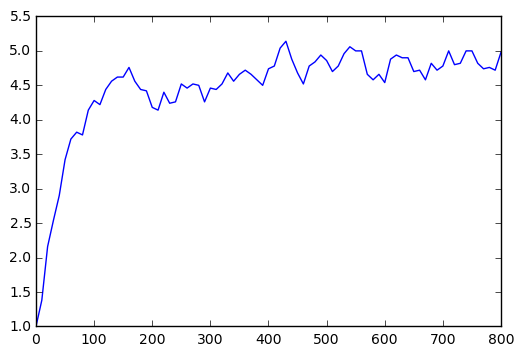

In [11]:
plt.plot(tt,Na)

4.75072831052
81
4.91183731454
81
4.73448877131
81


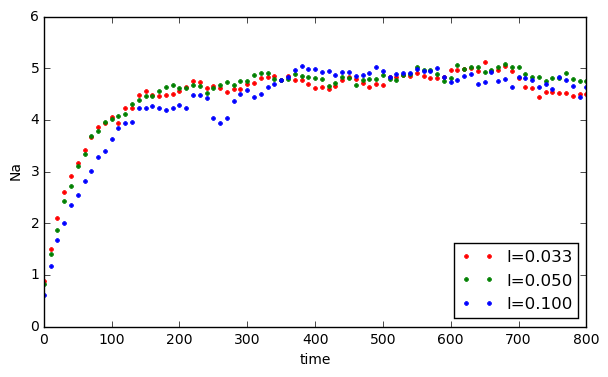

In [107]:
vox=[0.033,0.050,0.100]
clrs = ['r','g','b']
for i in range(3):
    dat = np.loadtxt('/home/chew/wrk/ecellwork/data/sturrockrxn02_{0:0.3f}.csv'.format(vox[i]),dtype='str',delimiter=',')
    y=[float(e) for e in dat[1]]
    x=[float(e) for e in dat[0]]
    print np.mean(y[-20:])
    print len(y)
    plt.plot(x,y,c=clrs[i],linestyle='',marker='.',label='l={0:0.3f}'.format(vox[i]))
plt.xlabel('time')
plt.ylabel('Na')
#plt.title("L={4:1.0f},Da={0:0.1f},ka={1:0.2f},k2={3:0.1f},Nb={5:1.0f}".format(Da,ka,kd,k2,L,Nb0))
fig = plt.gcf()
fig.set_size_inches(7,4)
plt.legend(loc='best')
#plt.savefig("figure/1st_order_production_2nd_order_degradation_Sturrock_rxn_Ks.png",format='png',dpi=100)
plt.show()

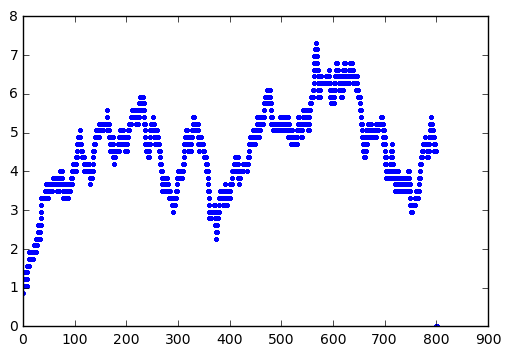

In [6]:
print dat[1]

In [102]:
0.02/4/3.14/0.1

0.015923566878980888

In [ ]:
a=[[1,2,3],[2,3,4]]
